In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.tail()


,Unnamed: 0,location,town,mortality,hardness
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81
60,61,North,York,1378,71


In [11]:
df_north = df[(df['location'] == 'North')]
df_south = df[(df['location'] == 'South')]
print(df_north.head())
print(df_south.head())

   Unnamed: 0 location        town  mortality  hardness
1           2    North  Birkenhead       1668        17
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
5           6    North      Bolton       1558        10
6           7    North      Bootle       1807        15
    Unnamed: 0 location         town  mortality  hardness
0            1    South         Bath       1247       105
2            3    South   Birmingham       1466         5
7            8    South  Bournemouth       1299        78
9           10    South     Brighton       1359        84
10          11    South      Bristol       1392        73


<AxesSubplot:title={'center':'Корреляция между смертностью и жесткостью воды ЮГ'}, xlabel='hardness', ylabel='mortality'>

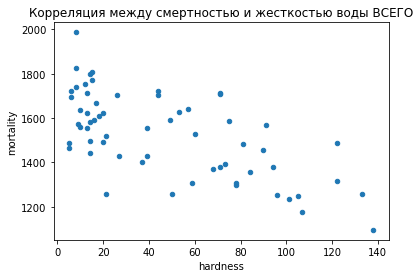

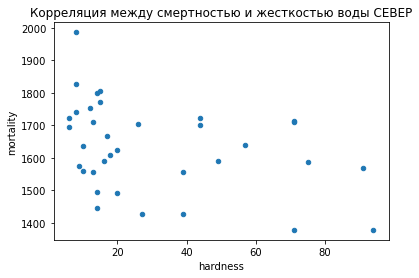

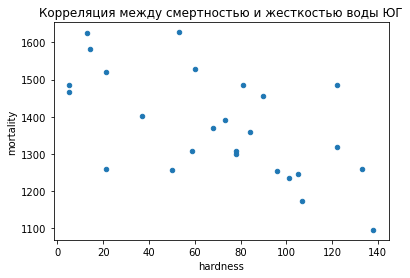

In [15]:
df.plot(kind='scatter', x='hardness', y='mortality', title='Корреляция между смертностью и жесткостью воды ВСЕГО')
df_north.plot(kind='scatter', x='hardness', y='mortality', title='Корреляция между смертностью и жесткостью воды СЕВЕР')
df_south.plot(kind='scatter', x='hardness', y='mortality', title='Корреляция между смертностью и жесткостью воды ЮГ')

Коэффициенты Пирсона

In [18]:
print(df[['hardness', 'mortality']].corr())
print(df_north[['hardness', 'mortality']].corr())
print(df_south[['hardness', 'mortality']].corr())


           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


Коэффициенты Спирмана

In [21]:
print(df[['hardness', 'mortality']].corr(method='spearman'))
print(df_north[['hardness', 'mortality']].corr(method='spearman'))
print(df_south[['hardness', 'mortality']].corr(method='spearman'))

           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X = df[['hardness']]
y = df['mortality']

X1 = df_north[['hardness']]
y1 = df_north['mortality']

X2 = df_south[['hardness']]
y2 = df_south['mortality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [31]:
model = LinearRegression()
model_north = LinearRegression()
model_south = LinearRegression()

model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
model_north.fit(X1_train, y1_train)
model_south.fit(X2_train, y2_train)

LinearRegression()

In [32]:
print(model.coef_)
print(model_north.coef_)
print(model_south.coef_)

[-3.13167087]
[-1.97686226]
[-3.51342921]


In [33]:
print(model.intercept_)
print(model_north.intercept_)
print(model_south.intercept_)

1668.9722977277095
1688.150229031281
1640.2204603423374


In [34]:
y_pred = model.predict(X_test)
print(y_pred)

print()

y_pred_north = model_north.predict(X1_test)
print(y_pred_north)

print()

y_pred_south = model_south.predict(X2_test)
print(y_pred_south)


[1340.14685615 1637.65558901 1625.12890552 1531.17877935 1424.7019697
 1606.33888028 1252.46007173 1434.09698232 1603.20720941 1650.18227249
 1484.20371627 1415.30695708 1546.83713371 1625.12890552 1446.62366581
 1546.83713371 1637.65558901 1621.99723465 1352.67353964]

[1672.33533095 1670.35846869 1660.47415739 1676.28905547 1656.52043287
 1547.79300857 1601.16828959 1672.33533095 1611.05260089 1658.49729513
 1611.05260089]

[1211.58209643 1622.65331428 1271.31039304 1211.58209643 1510.22357948
 1566.43844688 1432.92813681 1622.65331428]


In [35]:
print(model.score(X_test, y_test))   # метод возвращает значение коэффициента детерминации
print(model_north.score(X1_test, y1_test))
print(model_south.score(X2_test, y2_test))


0.5046490611017092
0.018885304285745863
-2.551922301235205


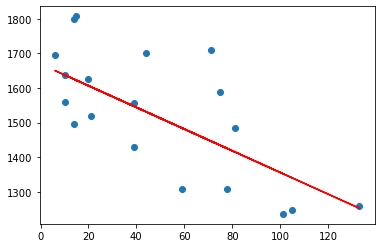

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

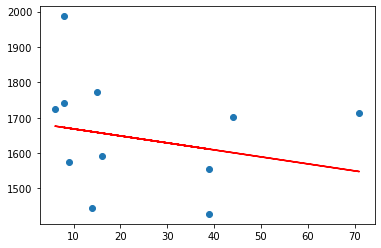

In [38]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y_pred_north, c='r')

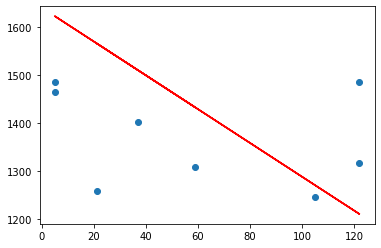

In [39]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y_pred_south, c='r')